In [ ]:
#this function will input preprocessed encoded, complete, fully numeric data and send through an XGBoost

#for more information on XGBoost and overtuning
#https://machinelearningmastery.com/tune-learning-rate-for-gradient-boosting-with-xgboost-in-python/

In [1]:
#import libraries
import time
import os

import numpy as np
from numpy.random import randn
import pandas as pd

import math
from math import sqrt
import statistics as stat

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import multilabel_confusion_matrix, balanced_accuracy_score
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
#import the file, you may have to import the location too
data = pd.read_csv('/media/titan/Storage 6/00_Datasets/IoT_datasets/MergedIoT23/Preproc_IoT23_drop3labels.csv')
X = data.drop(['label'], axis = 1)     #X are the features
y = data['label']                      #y is the label

In [3]:
#we will compare this with the 80/20 75/25, 65/35 split as well
tsz = 0.35

#split the data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsz, shuffle=True)

#set up for the parameters num_class
l = len(data['label'].unique())    

#normalize the data
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
    
startTime = time.time()
#transform numpy array into DMatrix format for xgboost
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

#parameters
param = {
    'max_depth':6,
    'eta': 0.35,
    'objective': 'multi:softmax',
    'num_class': l,
    'eval_metric': 'merror'}
    
epochs = 100

#train the model
model = xgb.train(param, train, epochs)

#make predictions
predictions = model.predict(test)

#time() returns the time as a floating point number expressed in seconds since the epoch, in UTC.
executionTime = (time.time() - startTime)

In [4]:
#metrics
precision = precision_score(y_test, predictions, average= 'macro')
bal_accuracy = balanced_accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average= 'macro')
recall = recall_score(y_test, predictions, average= 'macro')
MeanSq = sqrt(mean_squared_error(y_test, predictions))

#https://scikit-learn.org/stable/modules/model_evaluation.html#multiclass-and-multilabel-classification

#"macro" simply calculates the mean of the binary metrics, giving equal weight to each class. 
#In problems where infrequent classes are nonetheless important, macro-averaging may be a means
#of highlighting their performance. On the other hand, the assumption that all classes are equally
#important is often untrue, such that macro-averaging will over-emphasize the typically low performance
#on an infrequent class


#the balanced accuracy, which avoids inflated performance estimates on imbalanced datasets. 
#It is the macro-average of recall scores per class or, equivalently, raw accuracy where each 
#sample is weighted according to the inverse prevalence of its true class. 
#Thus for balanced datasets, the score is equal to accuracy.

In [5]:
#prints the metrics
print('Execution time in seconds: ', executionTime)

#average scores
print('Precision: ', precision * 100.00)
print('Balanced Accuracy: ', bal_accuracy * 100.00)
print('F1: ', f1 * 100.00)
print('Recall: ', recall * 100.00)
print('RMSE: ', MeanSq)

Execution time in seconds:  10487.351406812668
Precision:  91.1688852625695
Balanced Accuracy:  97.83072684144301
F1:  93.6709141196713
Recall:  97.83072684144301
RMSE:  0.44783916357702364


In [6]:
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9704    1.0000    0.9850  10799228
           1     0.6764    0.9988    0.8066    716792
           2     1.0000    1.0000    1.0000   2235727
           3     1.0000    0.9144    0.9553   7848262

    accuracy                         0.9689  21600009
   macro avg     0.9117    0.9783    0.9367  21600009
weighted avg     0.9744    0.9689    0.9698  21600009



In [7]:
###i would drop label 3, 6, and 1 or at least figure out what those are and how you can deal with it###

<AxesSubplot:>

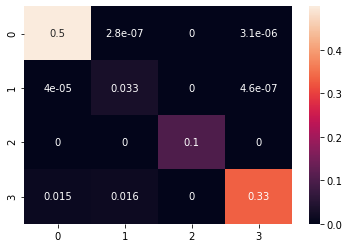

In [8]:
cm=confusion_matrix(y_test,predictions, normalize='all')
sns.heatmap(cm, annot=True)